
# Project: Investigate a Dataset (IMDB database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This project will analyse the IMDB dataset. The fields included in the dataset are:
id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj


For the purpose of this project the main focus will be on how different film genres perform. The questions that we will try to answer are:
1. What are the most common film genres released in recent years?
2. How successful are each of the genres in terms of profit made on a film?
3. What is the trend for how popular a genre is for each year?
4. Since we can't assume success is based only on the genre of a movie we will take a look at some other factors. Analyse which quarter had the most profit over the last few years.
5. Do the films with a higher vote average have a higher profit?


In [1]:
# Import packages
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


In [2]:
data = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling



### General Properties

Take a look at what data is included in the dataset.

In [3]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


* In order to calculate profit we will need to subtract the budget from revenue for each film.
* Need to remove any films that have a budget or revenue = 0 as this will skew the profits comparisons. 


In [4]:
data['profit'] = data['revenue'] - data['budget']

data = data[data.revenue != 0]

In [5]:
data.shape

(4850, 22)

The data set is quite large so we will make the set of info a bit smaller by only considering films released since the year 2000

In [6]:
data = data[data.release_year >= 2000]

In [7]:
data.shape

(3035, 22)

The data contains 22 variables and 3035 rows after we removed films that were released before the year 2000.
First, take a quick look at the data above to see if we need to clean or trim any of the data. On first look these points were made:
1. Cast, genres and production companies fields contain lists that are seperated by |. We will need to seperate out the genres in order to analyse them properly.
2. Overview, tagline and homepage fields will not be useful for data analysis as they contain strings that are unique to each film so you can't compare these fields. We won't include these fields in the new table made. 
3. Budget and revenue figures are reported as exponentials so make sure when analysing them to take this into account. 
4. Note: release date is in American format of month/date/year. 
5. Make a column that shows which quarter each release date is in.
6. There are some entries which have 0 for the Revenue and Budget so will need to remove these entries because they will skew the results. A film must have a budget and revenue, so these must have been marked as 0 because the information isn't available.  

### Data Cleaning 

First, create a new table with just the fields that we're inteersted in

In [8]:
new_dataset = data.filter(['profit','original_title', 'genres', 'release_date', 'release_year', 'vote_average'], axis=1)

In [9]:
new_dataset.head()

,profit,original_title,genres,release_date,release_year,vote_average
0,1363528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,6.5
1,228436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,7.1
2,185238201,Insurgent,Adventure|Science Fiction|Thriller,3/18/15,2015,6.3
3,1868178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,7.5
4,1316249360,Furious 7,Action|Crime|Thriller,4/1/15,2015,7.3


Next, remove | from the lists of genres

In [10]:
#First create a dataframe that just contains the genres
seperate_genres = new_dataset['genres'].str.split('|').apply(pd.Series, 1).stack()
seperate_genres.index = seperate_genres.index.droplevel(-1)
seperate_genres.name = 'genres'
#delete the original genres column from the dataset
del new_dataset['genres']
#merge the two dataframes together
final_dataframe = new_dataset.join(seperate_genres)

In [11]:
final_dataframe.head()

,profit,original_title,release_date,release_year,vote_average,genres
0,1363528810,Jurassic World,6/9/15,2015,6.5,Action
0,1363528810,Jurassic World,6/9/15,2015,6.5,Adventure
0,1363528810,Jurassic World,6/9/15,2015,6.5,Science Fiction
0,1363528810,Jurassic World,6/9/15,2015,6.5,Thriller
1,228436354,Mad Max: Fury Road,5/13/15,2015,7.1,Action


We will be analysing movies by what quarter they were released in so change the release date to a number depending on which quarter it was released in.
Movies released: 
* January - March = 1
* April -June = 2
* July - September = 3
* October - December = 4


In [12]:
#Change the format of the date to datetime so we can easily obtain what quarter the film was released in
final_dataframe['release_date'] = pd.to_datetime(final_dataframe['release_date'])
final_dataframe['quarter'] = final_dataframe['release_date'].dt.quarter 
#No longer need the relase date so we can get rid of that column
del final_dataframe['release_date']

The dataset we will be doing analysis on is shown below:

In [13]:
final_dataframe.head()

,profit,original_title,release_year,vote_average,genres,quarter
0,1363528810,Jurassic World,2015,6.5,Action,2
0,1363528810,Jurassic World,2015,6.5,Adventure,2
0,1363528810,Jurassic World,2015,6.5,Science Fiction,2
0,1363528810,Jurassic World,2015,6.5,Thriller,2
1,228436354,Mad Max: Fury Road,2015,7.1,Action,2


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Frequency of genre

In [14]:
#Create a dataframe showing the frequency of each type of genre
freq_genres_df = (pd.DataFrame(final_dataframe.groupby('genres').original_title.nunique())).sort_values('original_title', ascending=False )

In [15]:
freq_genres_df.head()

,original_title
genres,
Drama,1440
Comedy,1091
Thriller,875
Action,743
Romance,540


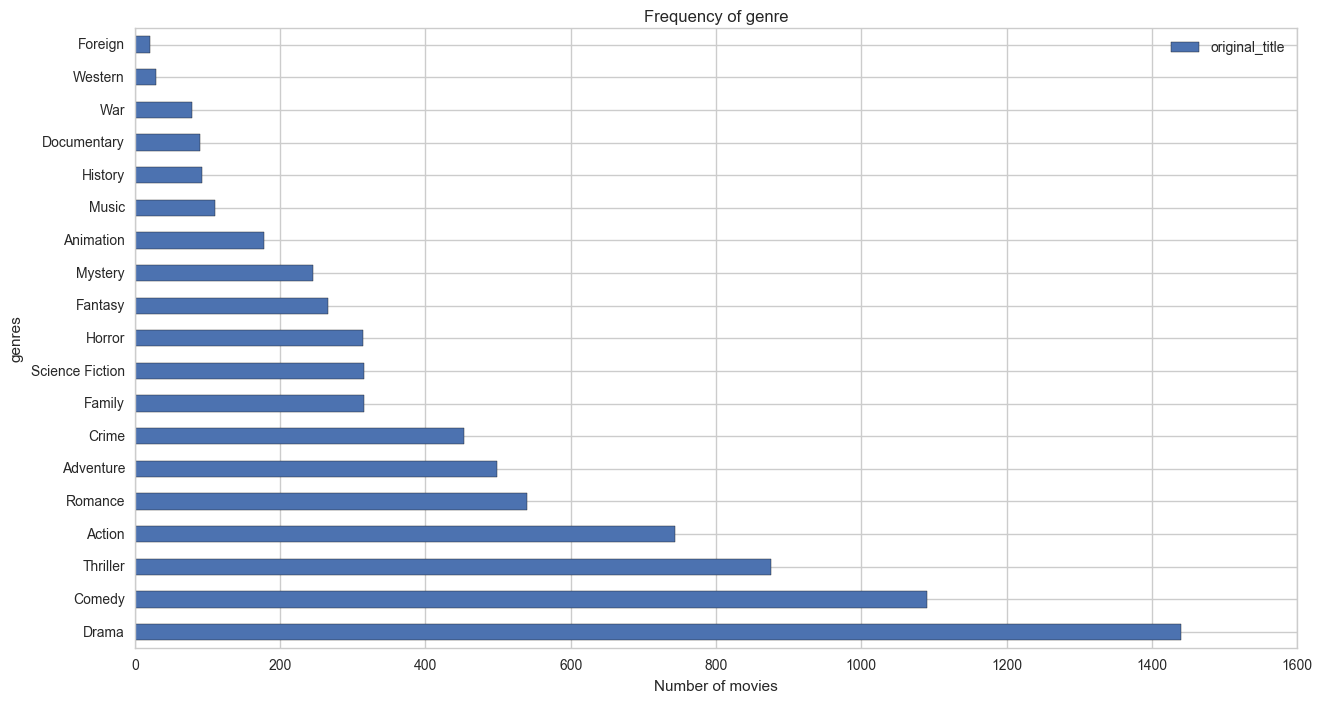

In [16]:
freq_genres_df[['original_title']].plot.barh(stacked=False, title = 'Frequency of genre', figsize=(15, 8));
plt.xlabel('Number of movies')
plt.show()

### 2. Mean profit made in each genre

Create a new dataframe that shows the mean profit made in each genre

In [17]:
profit_and_genres_df = final_dataframe[['original_title', 'profit', 'genres']]
mean_profit_vs_genre_df = profit_and_genres_df.groupby(['genres']).mean()
mean_profit_vs_genre_df = mean_profit_vs_genre_df.sort_values('profit', ascending=False)
mean_profit_vs_genre_df.head()


,profit
genres,
Fantasy,187373819
Animation,180062110
Adventure,175535130
Family,152896578
Science Fiction,129732085


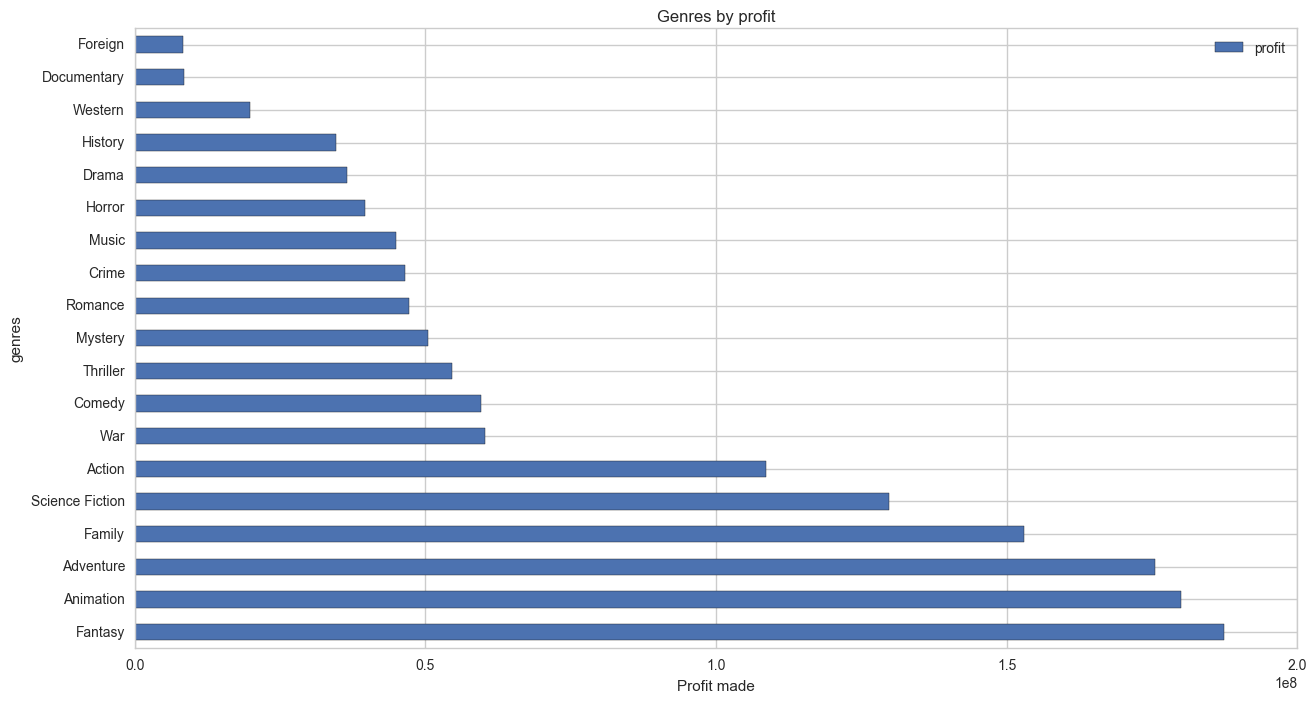

In [18]:
mean_profit_vs_genre_df[['profit']].plot.barh(stacked=False, title = 'Genres by profit', figsize=(15, 8));
plt.xlabel('Profit made')
plt.show()

### 3. Genre ranking for each year

We would like to grah the trends of how much profit genres make each year. Since the data includes 26 
unique genres the graph would be too crowded to clearly read the trends for all of the genres. Therefore we will
just look at the trends of the 5 most frequently produced genres. 

In [19]:
genre_profit_df = final_dataframe[['original_title', 'profit','release_year','genres']]
# Get the mean profit made feach year for each of the genres
genre_ranking_df = genre_profit_df.groupby(['genres', 'release_year'], as_index=False)['profit'].mean()
genre_ranking_df.head()


,genres,release_year,profit
0,Action,2000,67205575
1,Action,2001,69510277
2,Action,2002,93414300
3,Action,2003,109440293
4,Action,2004,77388098


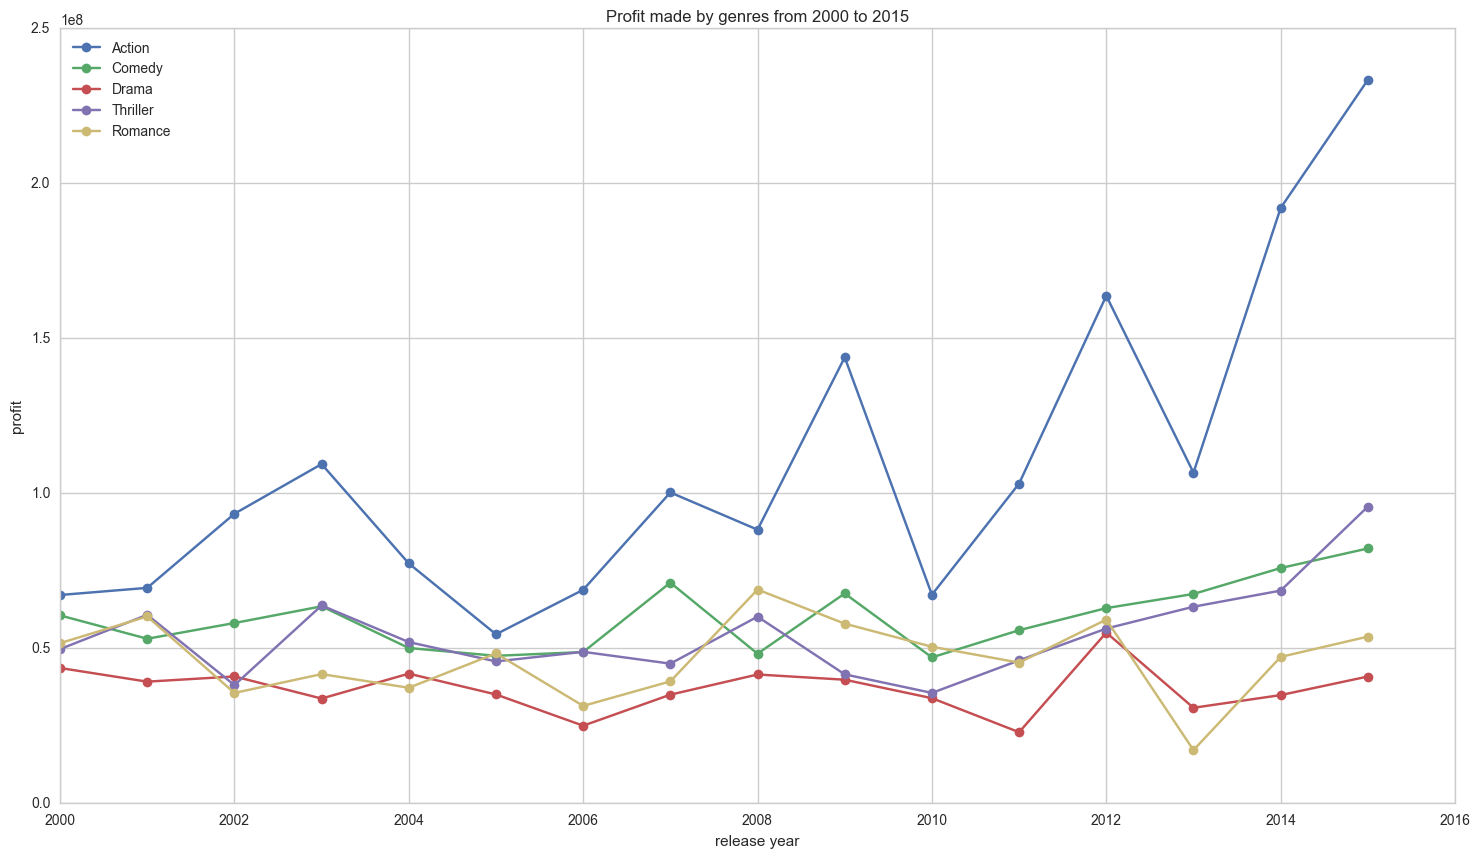

In [20]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(18,10))

for genres in ['Action','Comedy','Drama', 'Thriller', 'Romance']:
    ax.plot(genre_ranking_df[genre_ranking_df.genres==genres].release_year,
            genre_ranking_df[genre_ranking_df.genres==genres].profit,label=genres, marker='o')

ax.set_xlabel("release year")
ax.set_ylabel("profit")
ax.legend(loc='best')
plt.title('Profit made by genres from 2000 to 2015')
plt.show()


### 4. Does a higher vote average yield higher profit made on a film?

In [21]:
profit_and_vote_df = final_dataframe[['original_title', 'profit','vote_average']]
# Get the mean profit made for each vote_average score
mean_profit_vs_vote_avg_df = profit_and_vote_df.groupby(['vote_average']).mean()
mean_profit_vs_vote_avg_df.head()

,profit
vote_average,
2.1,9109322
2.2,-64926294
3.2,228
3.3,-11536140
3.4,36841872


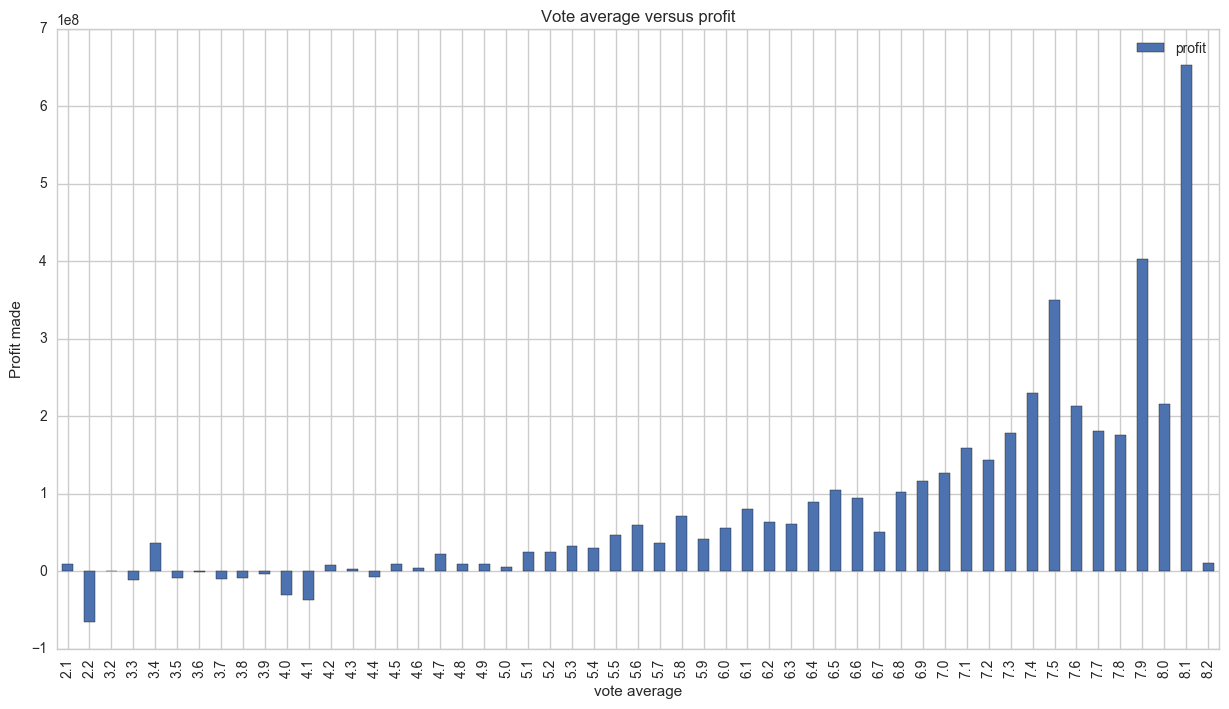

In [22]:
mean_profit_vs_vote_avg_df[['profit']].plot.bar(figsize=(15, 8));
#display edges around histogram bars
plt.title('Vote average versus profit')
plt.xlabel('vote average')
plt.ylabel('Profit made')
plt.show()

### 5. Which quarters are most profitable?

We will look at the mean profit made in each quarter since the year 2000 in order to see how much profit was made in each quarter.

In [23]:
profit_and_quarter_df = final_dataframe[['original_title', 'profit','quarter']]
# Get the mean profit made for each vote_average score
mean_profit_per_quarter_df = profit_and_quarter_df.groupby(['quarter']).mean()
mean_profit_per_quarter_df.head()

#df7 = (pd.DataFrame(final_dataframe.groupby('quarter').original_title.nunique())).sort_values('original_title', ascending=False)
#df7.head()


,profit
quarter,
1,52307729
2,120746129
3,49747290
4,92935718


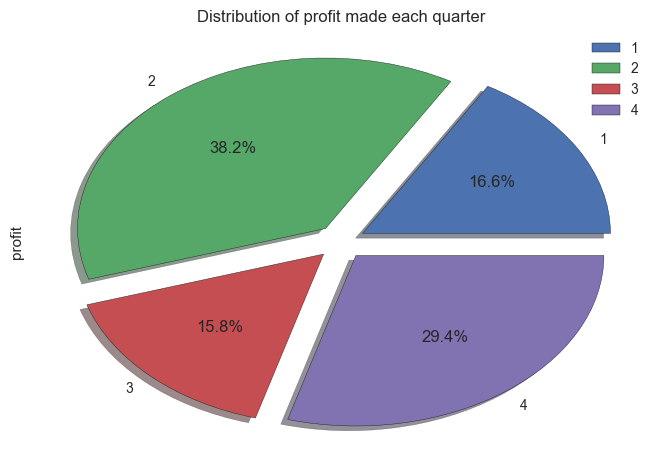

In [24]:
mean_profit_per_quarter_df.plot(kind='pie', y= 'profit', explode = (0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%', shadow=True, title='Distribution of profit made each quarter')
plt.show()

<a id='conclusions'></a>
## Conclusions


All the films provided in the original data all are labelled with more than one genre. So having to take in to account multiple genre classes for one film it is difficult to predict how it will perform based on genre only. However, the observations made can show how a film is likely to perform but is not a certainty. Although the observations below can be indicator as to how a film might perform there are many other factors to take into account, such as the director, the budget and even a films title. Other extraneous factors not related to the film can also affect its performance. Factors such as political events and weather can have an impact on how many people will watch a film.

Observations from data gathered from each of the posed questions: 

#### Q1: The top 5 popular genres (in order from most frequently produced) since the year 2000 are:
Drama, comedy, thriller, action and romance.
Although these are the most frequently produced genres it does not necessarily mean that they are the most profitable genres. Hence the next question analyses which genres made the most and least profit.

#### Q2: The 5 most profitable genres are:
Fantasy, animation, adventure, family and science fiction.
Already we can see the top 5 most profitable genres aren't the exact same as the 5 most frequently produced genres. However, all of them other than fantasy do still appear in the top 10 most frequently produced films. Therefore we can say that the most frequently produced films aren't directly the most profitable but are likely to still do well in terms of profit.
The 5 least profitable genres are:
Foreign, documentary, western, history and drama. 
Other than drama they appear towards the lower end of the spectrum of least frequently produced. So it seems that even though drama movies aren't extremely profitable studios are still willing to produce them. 
Overall we can see that the most frequently produced genre aren't directly corrlelated with how much profit it makes. However, the more frequently produced genres do tend to make a greater profit but there are some exceptions. 

#### Q3: Genre trends over the years
Action varies quite a lot from year to year yet it is still more profitable than other genres even when at its lowest peak.
Comedy is relatively stable with a few peaks in 2007 and 2009. From then onwards it seems to be on an upwards trajectory in terms of profit made.
Romance, thriller and drama seem to be in constant flux. Although they don't vary to the same extent as action films so the profit that they make is much more predictable than with action films.
Overall action films vary the most but always performs the best in terms of profit. The most stable are comedy and romance with thriller and drama also varying a good bit but not to the extent of variation that action has. 

#### Q4: Are vote average and profit correlated?
Below the average score of 5 films tend to either make a loss or only make a negligible profit. From the vote average from 5 up to 8.2 there is a general upwards trend of profit. It is also important to note that no film gained an average over 8.2 so no film from this filtered data set was given a perfect score.

#### Q5: The most profitable quarter 
Since 2000 is the second quarter, i.e. April to June is shown to be the most profitable. However this is averaged out over 15 years. This may change from year to year. This can merely be used as an indicator that movies are likely to be more profitable in the second quarter but it is not gaurenteed. Also the differnce between the second and fourth quarter aren't huge - roughly 10%. However there is a significant difference between the 1st and 3rd quarter (which are both close to 15%) and the 2nd and 4th quarter (which are both close to 30%). 
This can also be linked to how many films are released at that time of the year because a film may be less profitable if it is competing against a large number of other films. Another film which may not be as popular could make more profit if it doesn't have any or only a small amount of films to compete with. Hence, releasing a film in the seond quarter does not gaurentee that it will be more profitable than at other times of the year.

 